In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
img = Image.open("C:\\lee\\work\\Database\\sviro_uncertainty\\data\\segmentation\\rawdata\\sharan_test_adults_and_seats_and_objects\\sharan_test_imageID_2415_GT_4_4_1.png")

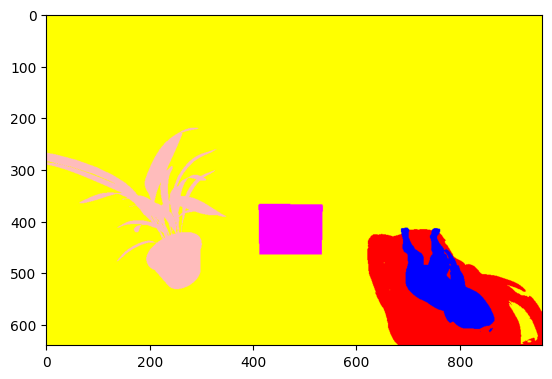

In [3]:
plt.imshow(img)

In [4]:
arr = np.array(img)

In [5]:
arr.shape

(640, 960, 3)

In [6]:
np.unique(arr[:,:,1])

array([  0, 188, 255], dtype=uint8)

In [11]:
def compress_segmap(arr, n_object=4):
    return arr[:,:,0] + n_object*arr[:,:,1] + n_object*n_object*arr[:,:,2]    

In [12]:
digitized = np.digitize(arr, bins=[-1,190,256])
segmap = compress_segmap(digitized)

ny, nx = segmap.shape
unique_keys = np.unique(segmap)

centers = []
bboxs = []

for unik in unique_keys:
    tmp = np.zeros_like(segmap)
    tmp[np.where(segmap == unik)] = unik
    
    xsum = np.sum(tmp, axis=0)
    ysum = np.sum(tmp, axis=1)

    ymin = np.argmax(ysum > 0)
    ymax = len(ysum) - np.argmax(ysum[::-1] > 0)
    #print(ymin, ymax)

    xmin = np.argmax(xsum > 0)
    xmax = len(xsum) - np.argmax(xsum[::-1] > 0)
    #print(xmin, xmax)
    if xmin == 0 and xmax == nx:
        continue
    
    xcen = 0.5 * (xmin + xmax)
    centers.append(xcen)
    
    bboxs.append([xmin, ymin, xmax, ymax])

# x 좌표 기준으로 정렬
ind_sort = np.argsort(centers)
bboxs = np.array(bboxs)[ind_sort]
print(bboxs)

[[411 367 536 465]
 [687 413 868 615]]


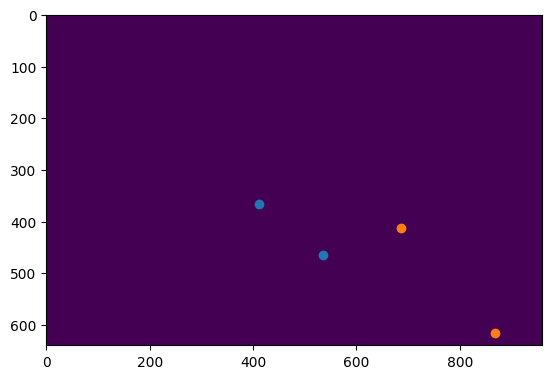

In [13]:
tmp = np.zeros_like(segmap)
tmp[np.where(segmap == 188)] = 188

plt.imshow(tmp)

for i in range(len(bboxs)):
    plt.scatter(bboxs[i][::2],bboxs[i][1::2])